# 0.0. Imports

In [55]:
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import inflection
import math


from IPython.core.display import HTML
from IPython.display import Image
from matplotlib import pyplot as plt


## 0.1. Helper Functions


In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns =  None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [4]:
df_sales_raw = pd.read_csv( 'data/train.csv', low_memory = False)
df_store_raw = pd.read_csv( 'data/store.csv', low_memory = False)

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how = 'left', on='Store')

In [ ]:
#df_raw.sample

# PASSO 01 - Descrição dos dados

## copy data / columns

In [5]:
df1 = df_raw.copy()

In [ ]:
#df1.columns

## 1.1. Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment',       'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list (map( snakecase, cols_old ) )

df1.columns = cols_new

In [ ]:
#df1.columns

## 1.2. Data Dimensions

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data Types

In [8]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [9]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [11]:
# competition_distance      

df1['competition_distance'] = df1['competition_distance'].apply(lambda x : 200000.0 if math.isnan( x ) else x )

# competition_open_since_month

df1['competition_open_since_month'] = df1.apply(lambda x : x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

# competition_open_since_year 

df1['competition_open_since_year'] = df1.apply(lambda x : x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )
                    
# promo2_since_week 

df1['promo2_since_week'] = df1.apply(lambda x : x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

# promo2_since_year           

df1['promo2_since_year'] = df1.apply(lambda x : x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

# promo_interval
month_map = { 1: 'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Agu', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dez' }

df1['promo_interval'].fillna( 0 , inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x :0 if x['promo_interval'] ==  0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0 , axis = 1 )



In [ ]:
#df1.isna().sum()

## 1.6. Change types

In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [13]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7. Descriptive Statistical

In [14]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])

cat_attributes = df1.select_dtypes( exclude=['int64', 'float64','datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [15]:
# Metricas tendência Central - MEAN, MEDIAN

ct1 = pd.DataFrame (num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame (num_attributes.apply( np.median ) ).T

# Metricas Dispersão - STD - MIN - MAX - RANGE - SKEW - KURTOSIS

d1 = pd.DataFrame (num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame (num_attributes.apply( min ) ).T
d3 = pd.DataFrame (num_attributes.apply( max ) ).T
d4 = pd.DataFrame (num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame (num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame (num_attributes.apply( lambda x: x.kurtosis()) ).T

# concat

m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis'] 
m



,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.141882,0.0,0.348929,2.052668,2.213451


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


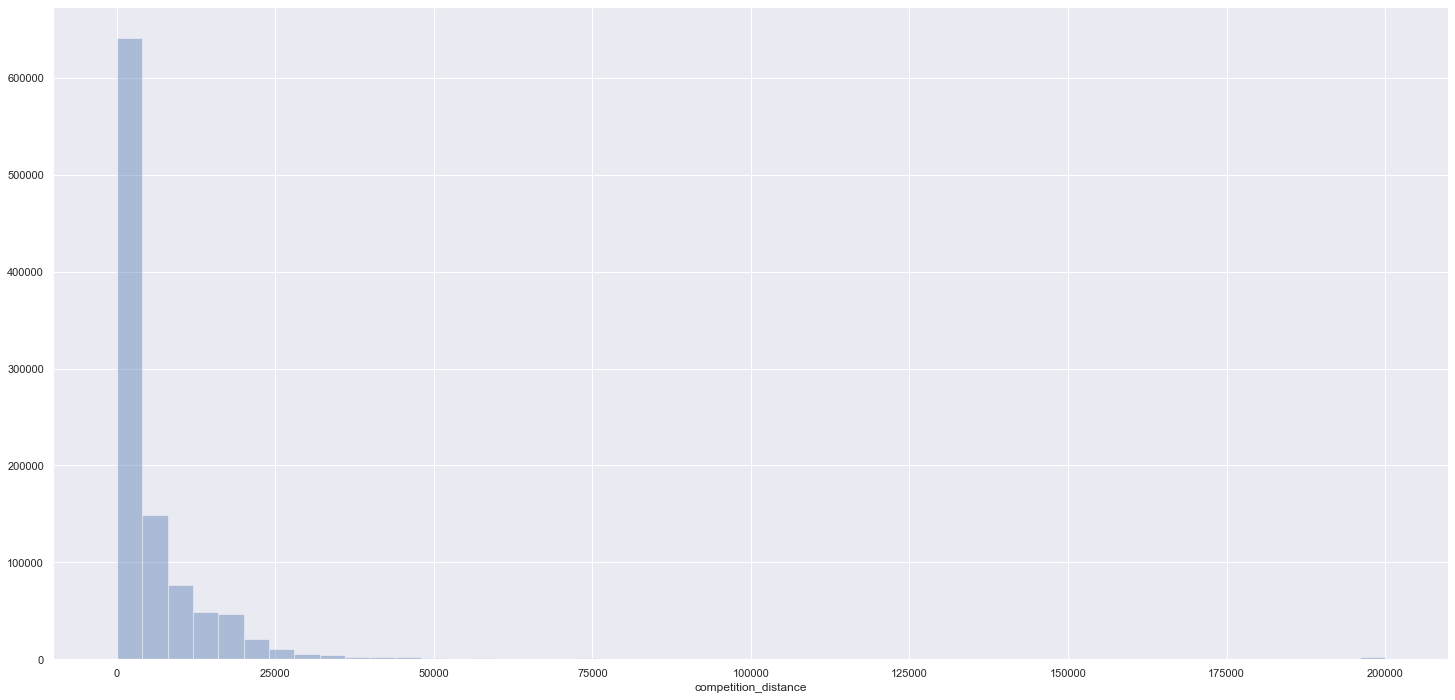

In [16]:

sns.distplot( df1['competition_distance'], kde=False);

### 1.7.2 Categoric Attributes


In [17]:
cat_attributes.apply( lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_map                       12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

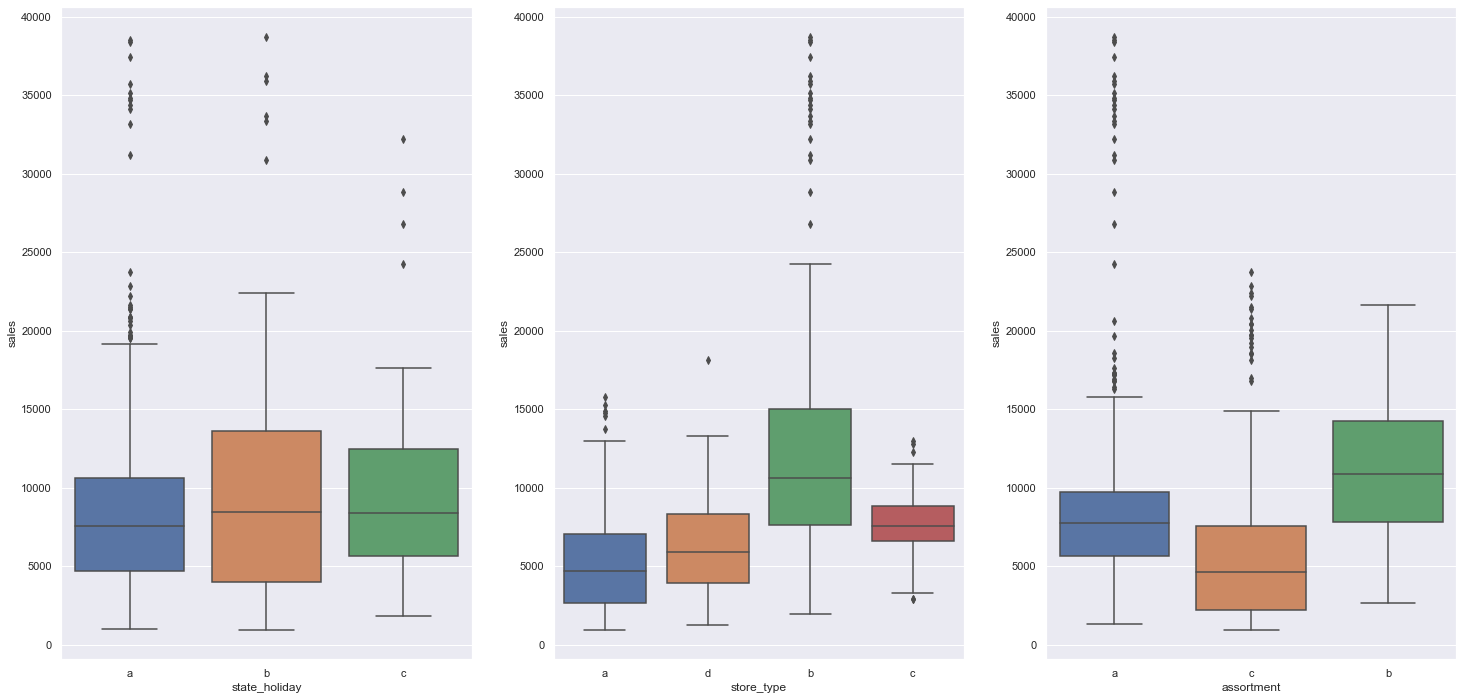

In [18]:
aux1 = df1[(df1['state_holiday'] != '0' ) & (df1['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( data = aux1, x = 'state_holiday', y = 'sales' )

plt.subplot( 1, 3, 2 )
sns.boxplot( data = aux1, x = 'store_type', y = 'sales' )

plt.subplot( 1, 3, 3 )
sns.boxplot( data = aux1, x = 'assortment', y = 'sales' )


# PASSO 02 - Feature Enineering

In [19]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

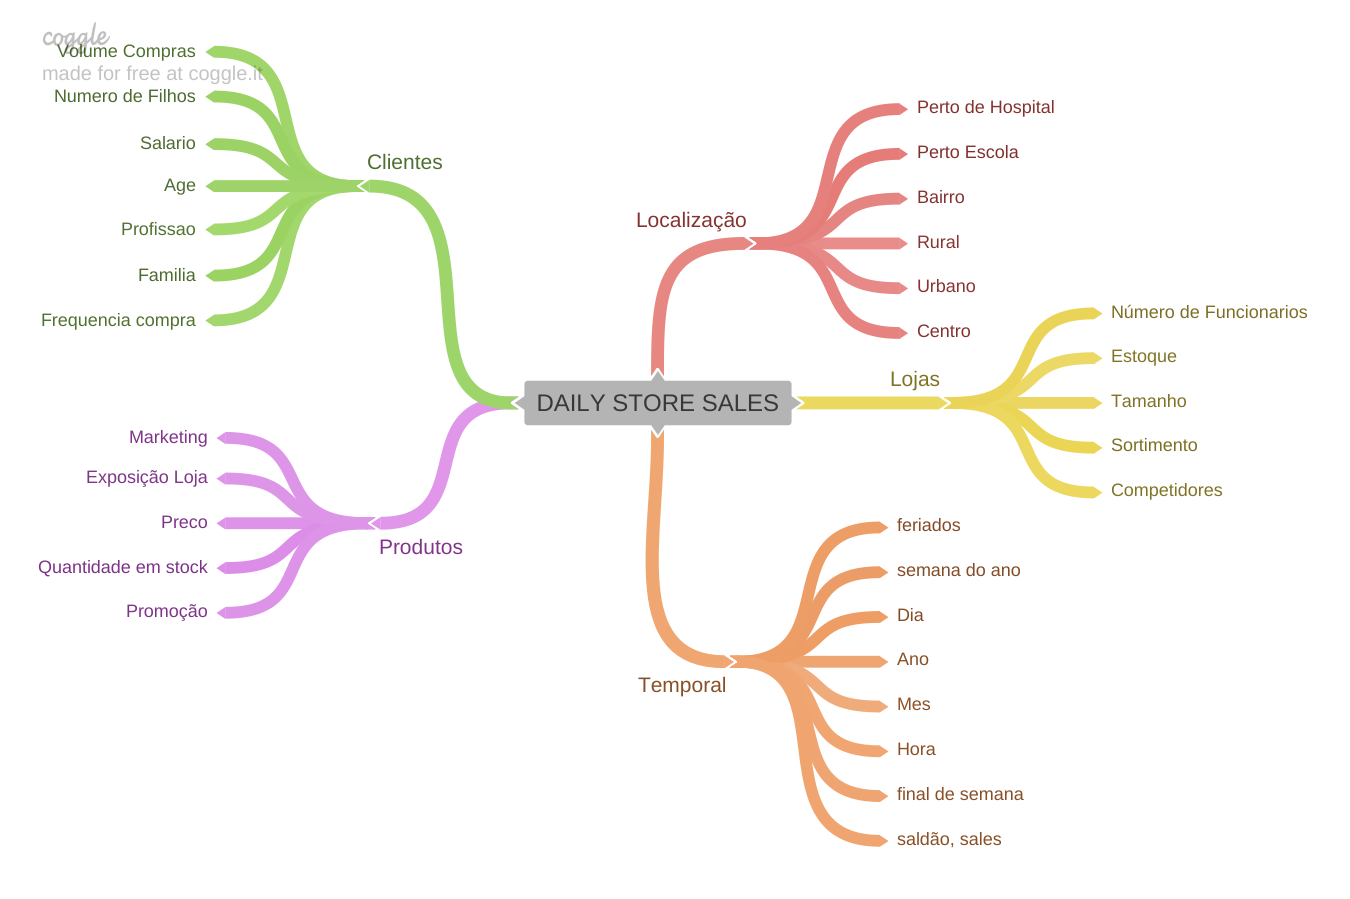

In [20]:
Image( 'img/MindMapHypothesis.png' )

## 2.1 Criação das Hipoteses

### 2.1.1. Hipoteses Loja

**1.** Lojas com número **maior quadro de funcionarios**, deveriam vender mais.

**2.** Lojas com **maior capacidade de estoque**, deveriam vender mais.

**3.** Lojas com **maior Porte**, deveriam vender mais.

**4.** Lojas com **maior sortimento**, deveriam vender mais.

**5.** Lojas com **competidores mas próximos**, deveriam vender menos.

**6.** Lojas com **competidores à mais tempo**, deveriam vender mais.




### 2.1.2. Hipoteses Produto

**1.** Lojas que **investem mais** em **Marketing** deveriam vender mais.

**2.** Lojas com **maior exposição do produtos** deveriam vender mais.

**3.** Lojas que tem **preços menores** nos **produtos** deveriam vender mais.

**4.** Lojas que tem **expoe menores** por **mais tempo nos produtos** deveriam vender mais.

**5.** Lojas com **promoções mais agressivos( descontos maiores)**, deveriam vender mais.

**6.** Lojas com **promoções ativas por mais tempo**, deveriam vender mais.

**7.** Lojas com **mais dias de promoção**, deveriam vender mais.

**8.** Lojas com **mais promoção consecutivas**, deveriam vender mais.



### 2.1.3. Hipoteses Tempo

**1.** Lojas abertas **durante o feriado de Natal**, deveriam vender mais.

**2.** Lojas deveriam vender mais **ao longo dos anos**.

**3.** Lojas deveriam vender mais **no segundo semestre do ano**.

**4.** Lojas deveriam vender mais **depois do dia 10 de cada mês**.

**5.** Lojas deveriam vender menos **aos finais de semana**.

**6.** Lojas deveriam vender menos **durante os feriados escolares**.

## 2.2. Lista Final de Hipóteses

**1.** Lojas com **maior sortimento**, deveriam vender mais.

**2.** Lojas com **competidores mas próximos**, deveriam vender menos.

**3.** Lojas com **competidores à mais tempo**, deveriam vender mais.

**4.** Lojas com **promoções ativas por mais tempo**, deveriam vender mais.

**5.** Lojas com **mais dias de promoção**, deveriam vender mais.

**6.** Lojas com **mais promoção consecutivas**, deveriam vender mais.

**7.** Lojas abertas **durante o feriado de Natal**, deveriam vender mais.

**8.** Lojas deveriam vender mais **ao longo dos anos**.

**9.** Lojas deveriam vender mais **no segundo semestre do ano**.

**10.** Lojas deveriam vender mais **depois do dia 10 de cada mês**.

**11.** Lojas deveriam vender menos **aos finais de semana**.

**12.** Lojas deveriam vender menos **durante os feriados escolares**.

## 2.3 Feature Engineering

In [21]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['week_year'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since
df2['competition_since'] = df2.apply( lambda x: dt.datetime( year=x['competition_open_since_year'] , month=x['competition_open_since_month'] , day=1),axis=1)
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since']) / 30).apply( lambda x: x.days ).astype( int )

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) +'-'+ df2['promo2_since_week'].astype( str )

df2['promo_since'] = df2['promo_since'].apply( lambda x: dt.datetime.strptime( x + '-1', '%Y-%W-%w' ) - dt.timedelta( days= 7 ) )

df2['promo_time_week'] = ( ( df2['date'] - df2['competition_since']) / 7).apply( lambda x: x.days ).astype( int )

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday'
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x  == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')


C:\Users\Caixa\AppData\Local\Temp/ipykernel_5148/1099862051.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [22]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# PASSO 03 - Filtragem de Variáveis


In [23]:
df3 = df2.copy()
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,week_year,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,360
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,404
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,452
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,308
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,17


## 3.1. Filtragem das linhas

In [24]:
df3 = df3[(df3['open'] != 0 ) & (df3['sales'] > 0)]

## 3.2. Seleçaõ de colunas

In [25]:
cols_drop = ['customers', 'open','promo_interval','month_map']
df3 = df3.drop( cols_drop , axis=1)

In [26]:
df3.shape

(844338, 25)

#  PASSO 4.0 - EDA - Análise Exploratoria de Dados

In [27]:
df4 = df3.copy()

##   4.1. Analise Univariada


###  4.1.1. Response Variable

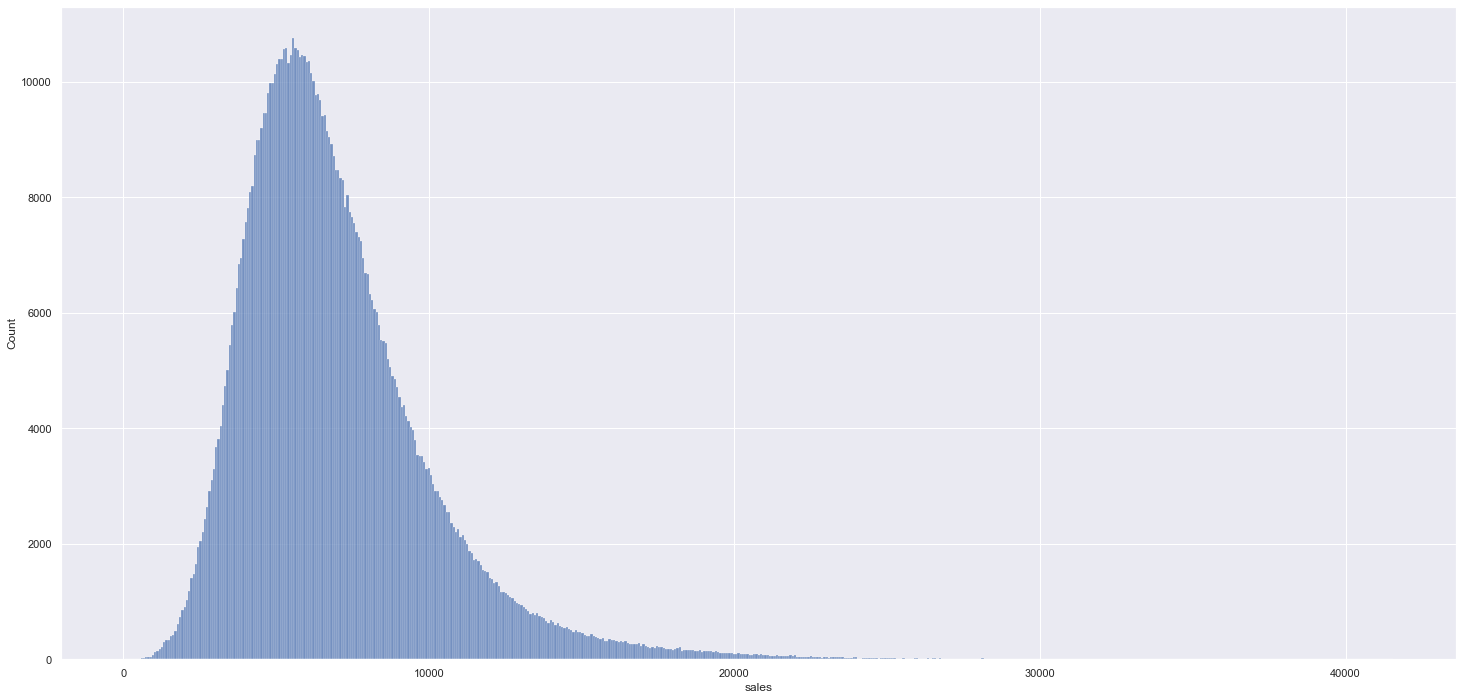

In [82]:
sns.histplot( df4['sales'] );

###  4.1.1. Numerical  Variable

In [ ]:
num_attributes.hist( bins = 25 );

###  4.1.1. Categorical Variable

In [ ]:
cat_attributes.head()

In [29]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [ ]:
# State_holiday 

plt.subplot( 3, 2, 1 )
a = df4[ df4['state_holiday'] != 'regular_day' ]
sns.countplot( a['state_holiday'] );

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[ df4['state_holiday'] == 'public_holiday' ]['sales'], label='public_holiday',shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'easter_holiday' ]['sales'], label='easter_holiday',shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'christmas' ]['sales'], label='christmas',shade=True )


# Store Types

plt.subplot( 3, 2, 3 )

sns.countplot( df4['store_type'] );

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[ df4['store_type'] == 'a' ]['sales'], label='a',shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'b' ]['sales'], label='b',shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'c' ]['sales'], label='c',shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'd' ]['sales'], label='d',shade=True )

# Assortment

plt.subplot( 3, 2, 5 )

sns.countplot( df4['assortment'] );

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[ df4['assortment'] == 'extended' ]['sales'], label='extend',shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'basic' ]['sales'], label='basic',shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'extra' ]['sales'], label='extra',shade=True )

##   4.2. Analise Bivariada


###  4.2.1. Categorical Variable

### **H1.** Lojas com **maior sortimento**, deveriam vender mais.
** FALSA ** Lojas com MAIOR SORTIMENTO vendem MENOS

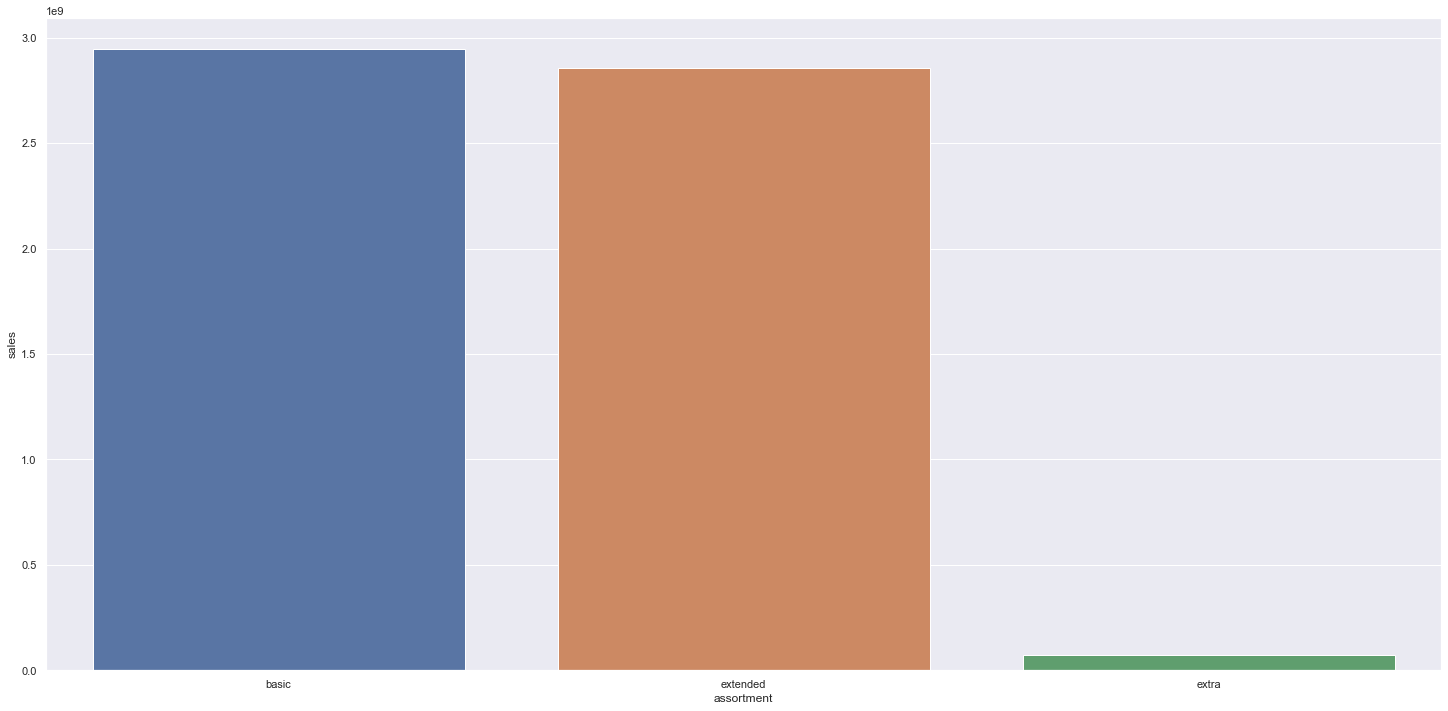

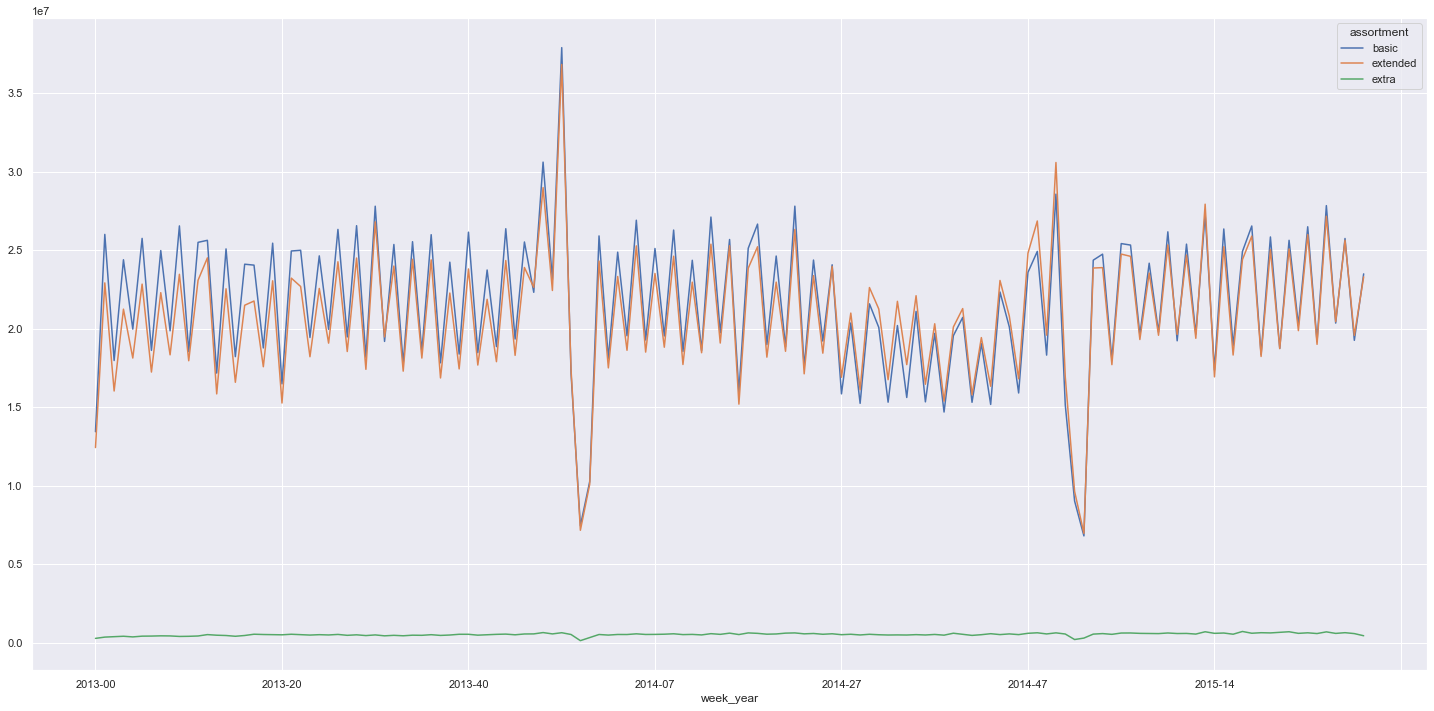

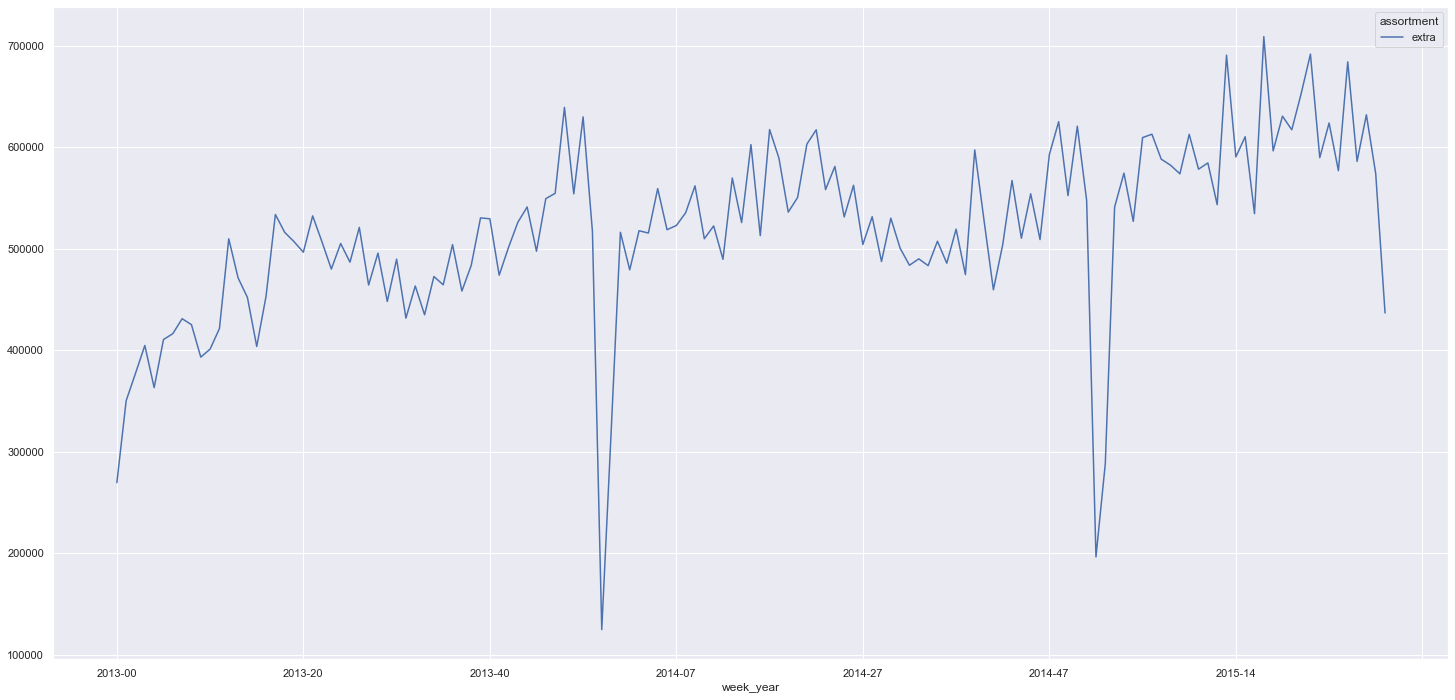

In [30]:
aux1 = df4[['assortment','sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x = 'assortment', y='sales', data=aux1);

aux2 = df4[['week_year','assortment','sales']].groupby( ['week_year','assortment' ]).sum().reset_index()
aux2.pivot( index='week_year', columns='assortment', values='sales' ).plot();

aux3 = aux2[aux2['assortment']== 'extra']
aux3.pivot( index='week_year', columns='assortment', values='sales' ).plot();


In [31]:
aux2.head()

,week_year,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693


In [32]:
aux3.head()

,week_year,assortment,sales
2,2013-00,extra,269404
5,2013-01,extra,350279
8,2013-02,extra,377207
11,2013-03,extra,404662
14,2013-04,extra,363061


### **H2.** Lojas com **competidores mas próximos**, deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS

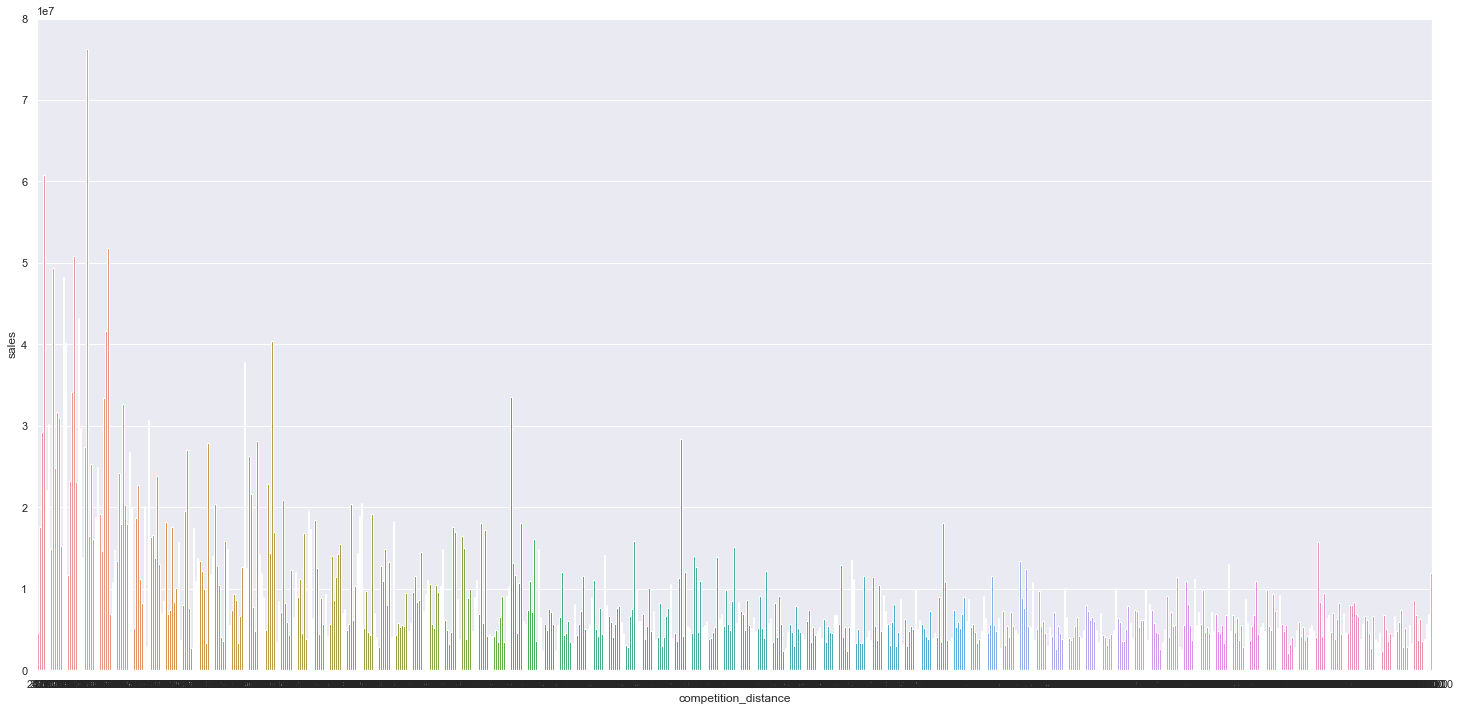

In [33]:
aux1 = df4[['competition_distance','sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.barplot( x= 'competition_distance', y='sales', data=aux1);

In [ ]:
# aux1 = df4[['competition_distance','sales']].groupby( 'competition_distance' ).sum().reset_index()

# bins = list( np.arange( 0, 30000, 1000) )
# aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )

# aux2 = aux1[['competition_distance_binned','sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

# sns.barplot( x='competition_distance_binned', y='sales', data=aux2);
# plt.xticks( rotation=75);

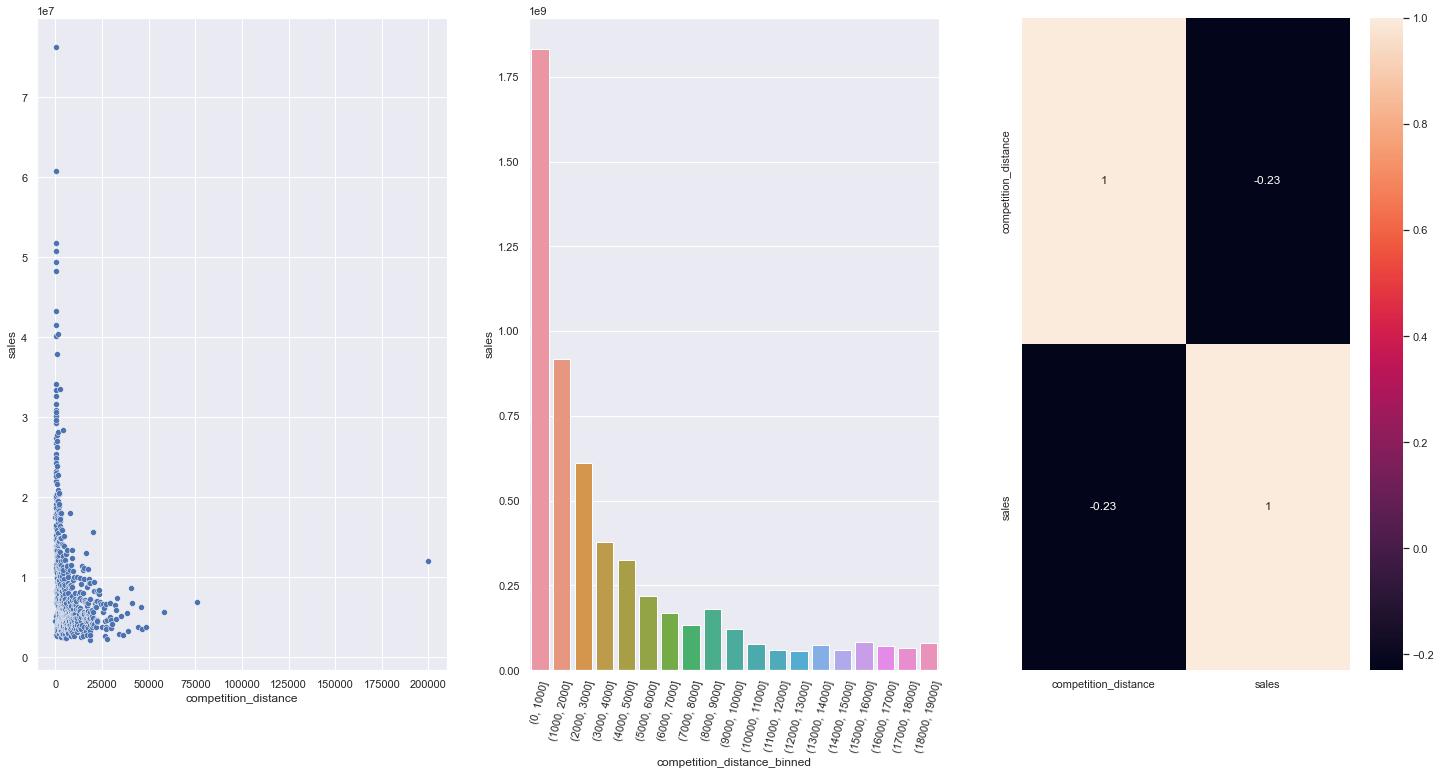

In [34]:
aux1 = df4[['competition_distance','sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.subplot( 1,3,1) 
sns.scatterplot(x = 'competition_distance', y= 'sales', data=aux1);

plt.subplot( 1, 3, 2)
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )

aux2 = aux1[['competition_distance_binned','sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

sns.barplot( x='competition_distance_binned', y='sales', data=aux2);
plt.xticks( rotation=75);

plt.subplot( 1, 3, 3)

sns.heatmap( aux1.corr( method='pearson' ), annot=True);



### **H3.** Lojas com **competidores à mais tempo**, deveriam vender mais.
**FALSA** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS

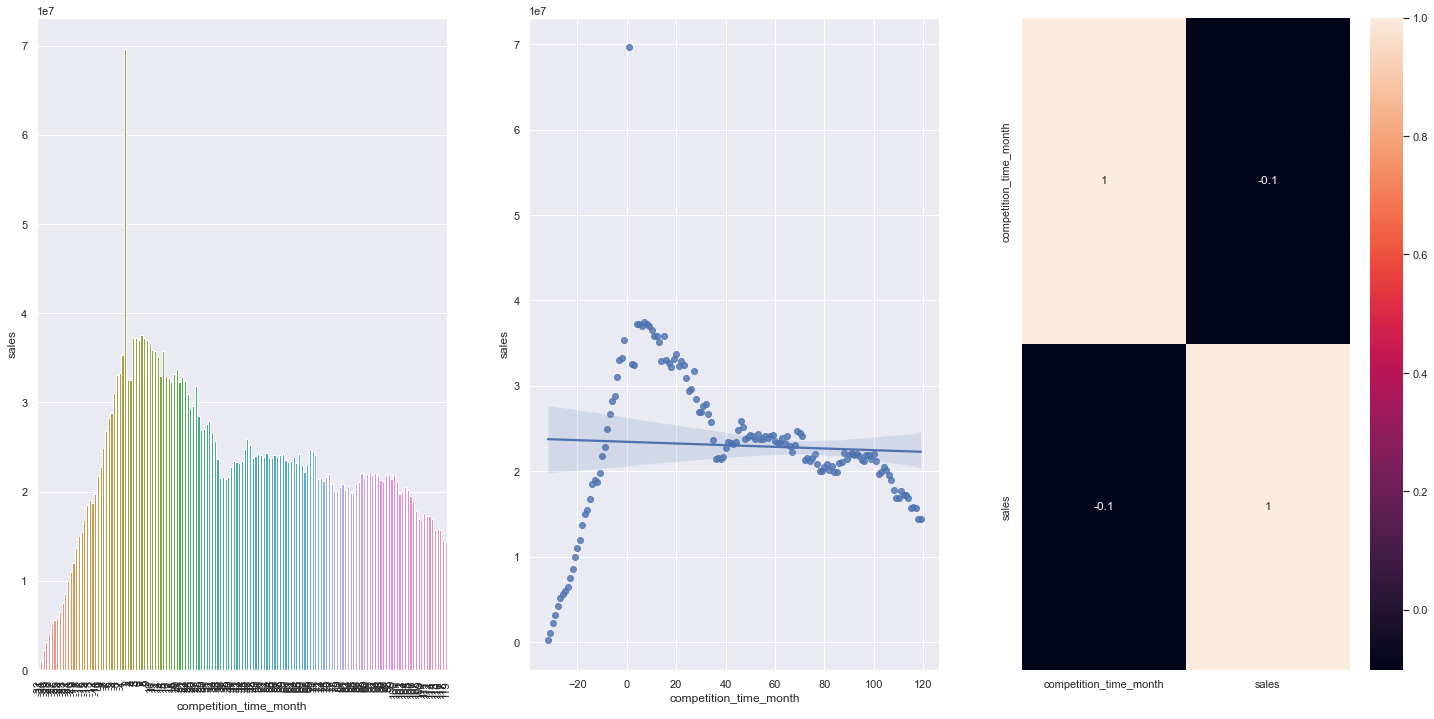

In [35]:
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
aux2 = aux1[(aux1['competition_time_month'] < 120 ) & (aux1['competition_time_month'] != 0)]
sns.barplot( x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90);

plt.subplot( 1, 3, 2 )
sns.regplot( x='competition_time_month', y='sales', data=aux2 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True);


### **H4.** Lojas com **promoções ativas por mais tempo**, deveriam vender mais.
**FALSA** Lojas com promoções ativas por mais tempo vendem menos, depois de um certo periodo de promoção

In [ ]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

aux2 = aux1[(aux1['promo_time_week'] > 0) & (aux1['sales'] < 1000000 )] # Promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

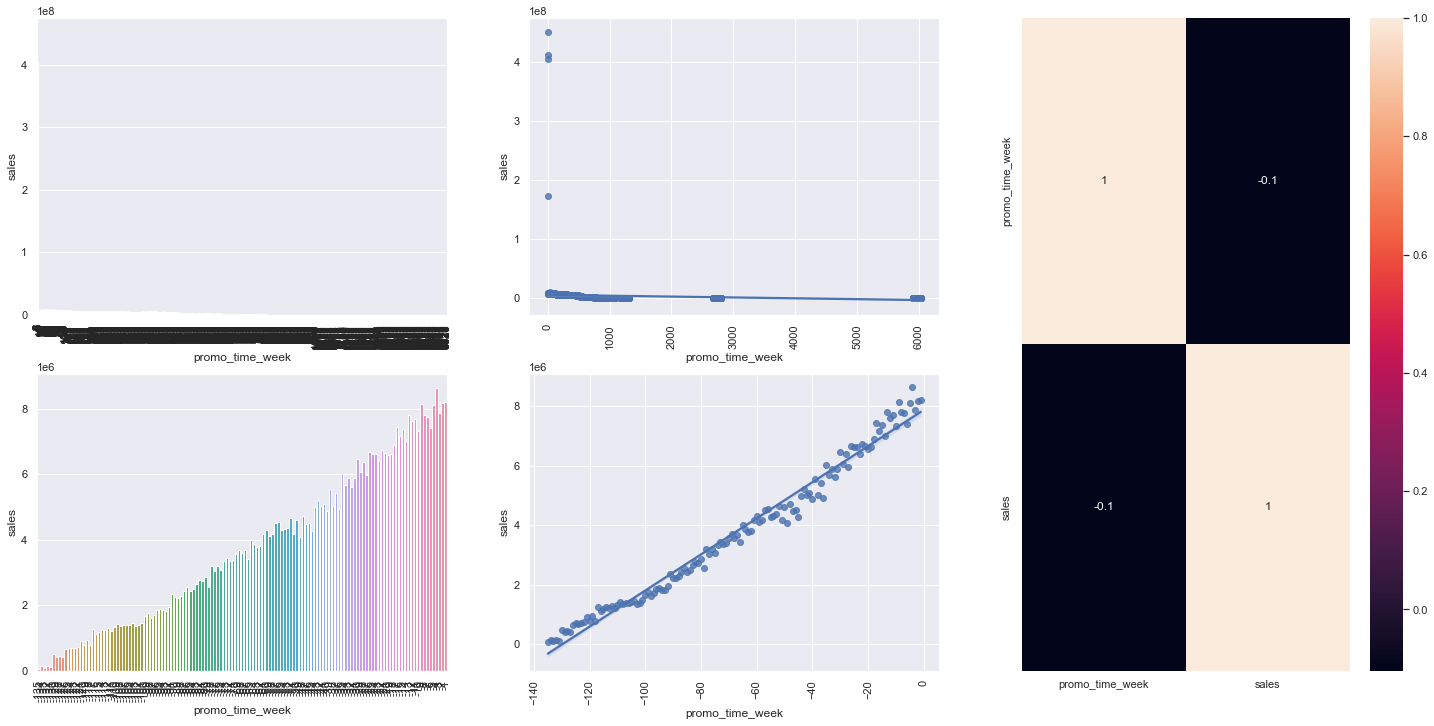

In [96]:
grid = gridspec.GridSpec( 2, 3)

plt.subplot( grid[ 0, 0 ] )
aux2 = aux1[aux1['promo_time_week'] > 0 ] # extendido
sns.barplot( data=aux2, x='promo_time_week', y='sales');
plt.xticks( rotation=90 );

plt.subplot( grid[ 0, 1 ] )
sns.regplot( data=aux2, x='promo_time_week', y='sales');
plt.xticks( rotation=90 );

plt.subplot( grid[ 1, 0 ] )
aux3 = aux1[aux1['promo_time_week'] < 0 ] # regular
sns.barplot( data=aux3, x='promo_time_week', y='sales');
plt.xticks( rotation=90 );


plt.subplot( grid[ 1, 1 ] )
sns.regplot( data=aux3, x='promo_time_week', y='sales');
plt.xticks( rotation=90 );

plt.subplot( grid[ :, 2 ] )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


<s>### **H5.** Lojas com **mais dias de promoção**, deveriam vender mais.</s>

### **H6.** Lojas com **mais promoção consecutivas**, deveriam vender mais.
**FALSA** Lojas com mais promoções consecutivas vendem **menos**.

In [103]:
df4[['promo','promo2','sales']].groupby( [ 'promo', 'promo2' ] ).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


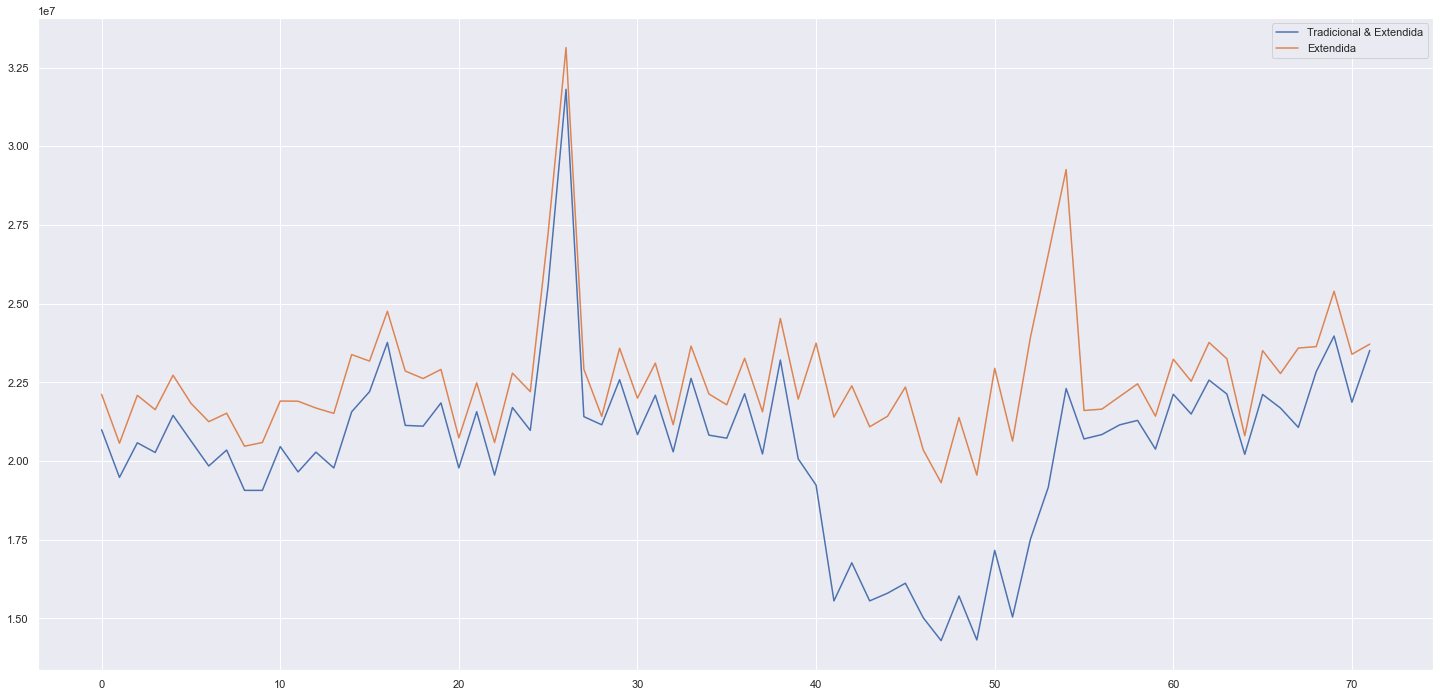

In [107]:
aux1 = df4[(df4['promo'] == 1) &  (df4['promo2'] == 1)][['week_year','sales']].groupby('week_year').sum().reset_index()
ax = aux1.plot()

aux2 = df4[(df4['promo'] == 1) &  (df4['promo2'] == 0)][['week_year','sales']].groupby('week_year').sum().reset_index()
aux2.plot( ax=ax )

ax.legend( labels=['Tradicional & Extendida', 'Extendida']);

###  4.1.1. Categorical Variable

##   4.1. Analise Univariada


##   4.1. Analise Univariada
